In [193]:
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import numpy as np

import nbody

In [194]:
gravity, masses, times, coords, tf = nbody.solve_for('HD2039')
t = times
r = coords

Calculating trajectories...
Solved in 3.57524
Writing times data to data/0f9ab0075fe0d68...
Finished writing times data
Writing coordinates to data/0f9ab0075fe0d68...
Finished writing coordinates data
Updated index


In [195]:
_, speeds = np.split(r, 2)

In [196]:
n = masses.size
vel = speeds.reshape(3, n, speeds.size // 3 // n)

In [197]:
star_speed = vel[:,0,:]

In [198]:
rad1 = np.array([
    [2451118.057282, 9.7, 8.5],
    [2451118.960972, -14., 15.],
    [2451119.944525, -2., 11.],
    [2451121.038461, -5., 14.],
    [2451211.951424, -29., 16.],
    [2451212.923368, -16., 11.],
    [2451213.974942, -13., 15.],
    [2451214.917072, -19., 10.],
    [2451386.322743, -34., 15.],
    [2451387.298102, -21., 11.],
    [2451411.229306, -12., 16.],
    [2451414.258484, -36., 11.],
    [2451473.088310, -50.6, 9.9],
    [2451525.928646, -73., 16.],
    [2451527.922569, -59., 12.],
    [2451745.270185, -66., 20.],
    [2451828.070301, -42., 14.],
    [2451828.994065, -42., 12.],
    [2451829.975741, -50., 13.],
    [2451856.070231, -42., 20.],
    [2451919.943437, -12., 14.],
    [2451920.967153, -4., 14.],
    [2452093.294734, 155., 15.],
    [2452127.234120, 76., 15.],
    [2452151.222963, 49.5, 9.6],
    [2452152.086030, 55.0, 9.0],
    [2452154.212373, 62., 12.],
    [2452187.095741, 39.4, 9.6],
    [2452188.030000, 42.1, 8.1],
    [2452189.150208, 38., 10.],
    [2452190.093315, 36.0, 7.3],
    [2452422.328090, -30., 13.],
    [2452425.332222, -27.8, 7.9],
    [2452455.285130, -37.2, 6.0],
    [2452477.254306, -22., 21.],
    [2452511.104514, -28., 13.],
    [2452599.015313, -36., 12.],
    [2453007.029464, -17.0, 5.7],
    [2453045.919745, -16., 12.],
    [2453245.255355, 95.8, 7.7],
    [2453579.224159, -6.9, 6.3],
])

In [199]:
rad2 = np.array([
    [2451118.0578, 25.4, 8.4],
    [2451118.9610, -23.3, 16.7],
    [2451119.9445, 1.9, 11.7],
    [2451121.0385, -29.6, 16.2],
    [2451211.9514, -12.3, 18.8],
    [2451212.9234, 8.6, 13.4],
    [2451213.9749, 0.0, 17.0],
    [2451214.9171, -11.6, 13.7],
    [2451386.3227, -52.2, 17.1],
    [2451387.2981, -29.0, 15.3],
    [2451411.2293, -13.3, 15.5],
    [2451414.2585, -14.1, 10.6],
    [2451473.0883, -40.9, 10.6],
    [2451525.9286, -76.1, 13.7],
    [2451527.9226, -28.3, 10.9],
    [2451745.2702, -49.2, 17.6],
    [2451828.0703, -42.6, 12.7],
    [2451828.9943, -47.6, 10.5],
    [2451829.9757, -43.1, 11.4],
    [2451856.0702, -31.0, 15.0],
    [2451919.9434, -26.4, 14.4],
    [2451920.9672, -20.5, 14.5],
    [2452093.2947, 138.8, 14.2],
    [2452127.2341, 100.3, 15.0],
    [2452151.2230, 66.4, 8.3],
    [2452152.0860, 69.3, 9.6],
    [2452154.2124, 74.9, 11.6],
    [2452187.0957, 56.6, 9.8],
    [2452188.0300, 51.3, 8.4],
    [2452189.1502, 59.7, 11.8],
    [2452190.0931, 51.1, 8.5],
    [2452422.3281, -7.4, 11.2],
    [2452425.3322, -1.3, 7.6],
    [2452455.2852, -27.3, 6.1],
    [2452477.2543, -39.3, 14.1],
    [2452511.1045, -26.7, 15.2],
])

Text(0.5, 1.0, 'HD2039')

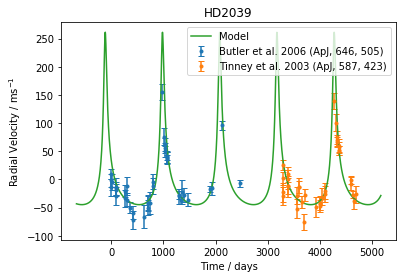

In [200]:
plt.errorbar(rad1[:, 0] - rad1[0, 0], rad1[:, 1], yerr=rad1[:, 2], marker='.', ls='', capsize=3, label='Butler et al. 2006 (ApJ, 646, 505)')
plt.errorbar(rad2[:, 0] - rad2[0, 0] + 3300, rad2[:, 1], yerr=rad2[:, 2], marker='.', ls='', capsize=3, label='Tinney et al. 2003 (ApJ, 587, 423)')

obs_vec = np.array([[-1], [7], [0]])
mag = np.linalg.norm(obs_vec)
radial_velocity = np.dot(star_speed.T, obs_vec / mag)

plt.plot(t * 365.25 - 670, radial_velocity * 1000 / 0.21, label='Model')
plt.legend()
plt.xlabel('Time / days')
plt.ylabel('Radial Velocity / $\mathrm{ms^{-1}}$')
plt.title('HD2039')